In [1]:
! pip install pyfolio
! pip install PyPortfolioOpt

     |████████████████████████████████| 91 kB 596 kB/s 
     |████████████████████████████████| 50 kB 2.1 MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88667 sha256=312f8b706b5899e18bc70e36e1bdc536c90a9fb08946e68374beebd2214b671e
  Stored in directory: /root/.cache/pip/wheels/2a/72/98/e93e1a091c5c2255ee49b299d4b8e955bab09fd3b9695f2218
  Created wheel for empyrical: filename=empyrical-0.5.3-py3-none-any.whl size=37090 sha256=294fe4503f40d6306683769f01e7de676d8f482b3c59fb4bf42a740983ec71f8
  Stored in directory: /root/.cache/pip/wheels/9e/5a/69/db414a9fb2abedee8b26f6efd5d0715e68ab0101caaa5f1a9c
Successfully built pyfolio empyrical
     |████████████████████████████████| 48 kB 359 kB/s 
     |████████████████████████████████| 11.6 MB 6.6 MB/s 


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pypfopt import risk_models as RiskModels
import datetime
from pypfopt import black_litterman
from pypfopt.black_litterman import BlackLittermanModel
from pypfopt.efficient_frontier import EfficientFrontier
%matplotlib inline
# portfolio optimizationのライブラリを使用
# https://pyportfolioopt.readthedocs.io/en/latest/

## read historical Data
## データの読み込み
ここでは、その日までにわかっているデータのみを読み込む

In [3]:
prices = pd.read_csv("/kaggle/input/group3data/his_data.csv", names=("Date", "JPY", "NZD", "AUD", "EUR", "GBP", "HKD", "BRL", "DKK", "INR", "CAD", "CHF")).drop(0)
prices['Date'] = prices['Date'].astype('str')
prices['Date'] = prices["Date"].str[:4] + "-" + prices["Date"].str[4:6] + "-" + prices["Date"].str[6:8]
prices['Date'] = pd.to_datetime(prices['Date'])
prices = prices.set_index('Date')
currencies = ["JPY", "NZD", "AUD", "EUR", "GBP", "HKD", "BRL", "DKK", "INR", "CAD", "CHF"]
for currency in currencies:
    prices[currency] = prices[currency].astype(float)

In [4]:
shrunk_covariance = RiskModels.CovarianceShrinkage(prices)
shrunk_covariance = shrunk_covariance.shrunk_covariance()

## reflect my forecasting to Portfolio
## 見通しの反映
どこ(Pの列で指定)がどれくらいの確率(Omega)で何％(Q)変化するかを予測する必要がある。

In [5]:
weight_set = []
P = np.array([
        [-0.3,-0.1,-0.2,-0.2,-0.1,-0.1,1, 0, 0, 0, 0],# BRL up 3%
        [1,0,0,0,0,0,0,0,0,0,0]]) # JPY up 1%
Q = np.array([[0.0003],[0.001]]) # 2-vector
delta = black_litterman.market_implied_risk_aversion(prices["JPY"])
Omega = BlackLittermanModel.default_omega(cov_matrix = shrunk_covariance, P = P, tau = 0.05)
bl = BlackLittermanModel(shrunk_covariance, P = P, Q = Q, omega = Omega)
rets = bl.bl_returns()
bl.bl_weights(delta)
weight = bl.clean_weights()

/opt/conda/lib/python3.6/site-packages/pypfopt/black_litterman.py:252: UserWarning: Running Black-Litterman with no prior.
  warnings.warn("Running Black-Litterman with no prior.")


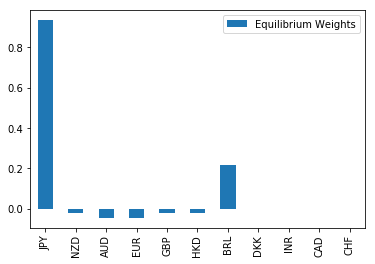

In [6]:
df = pd.DataFrame(weight,
                  columns=currencies,
                  index=['Equilibrium Weights'])
df.T.plot(kind='bar')

↑ this result means my forecasting is reflected in portfolio  
↑日本が1%上がるとしていたり、BRLが他よりも3%上がるという予測を反映している結果になっている。